<a href="https://colab.research.google.com/github/Hoirotunnisa/Menentukan-Kombinasi-Fitur-Media-Sosial-yang-Paling-Banyak-Disukai-Mahasiswa-Analisis-TURF/blob/main/StatMul_TURF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Menentukan Kombinasi Fitur Media Sosial yang Paling Banyak Disukai Mahasiswa: Analisis TURF**
- **Nama        :** Hoirotun Nisa'
- **Kelas       :** Matematika 6B
- **NIM         :** 11220940000003

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import ipywidgets as widgets
from IPython.display import display, clear_output
import itertools

### Gathering Data

In [ ]:
# Load data
df = pd.read_excel("/content/data turf statmul.xlsx")

### Assessing Data

In [ ]:
# Informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   pengguna            147 non-null    int64
 1   WhatsApp            147 non-null    int64
 2   Instagram           147 non-null    int64
 3   TikTok              147 non-null    int64
 4   Facebook            147 non-null    int64
 5   Telegram            147 non-null    int64
 6   Twitter             147 non-null    int64
 7   Line                147 non-null    int64
 8   Mencari informasi   147 non-null    int64
 9   Melihat berita      147 non-null    int64
 10  Hiburan             147 non-null    int64
 11  Komunikasi          147 non-null    int64
 12  Melihat story       147 non-null    int64
 13  Belajar             147 non-null    int64
 14  Eksplorasi beranda  147 non-null    int64
 15  Sumber informasi    147 non-null    int64
 16  Hal baru            147 non-null    int64
 1

In [ ]:
# Cek missing value dataset
df.isnull().sum()

,0
pengguna,0
WhatsApp,0
Instagram,0
TikTok,0
Facebook,0
Telegram,0
Twitter,0
Line,0
Mencari informasi,0
Melihat berita,0


### Cleaning dan Preprocessing Dataset

In [ ]:
# Cek duplikat data
df.duplicated().sum()

np.int64(0)

In [ ]:
# Hapus data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
print(df.columns)


Index(['pengguna', 'WhatsApp', 'Instagram', 'TikTok', 'Facebook', 'Telegram',
       'Twitter', 'Line', 'Mencari informasi', 'Melihat berita', 'Hiburan',
       'Komunikasi', 'Melihat story', 'Belajar', 'Eksplorasi beranda',
       'Sumber informasi', 'Hal baru', 'Bisnis', 'Inspirasi'],
      dtype='object')


In [ ]:
# Pilih hanya kolom media sosial
media_cols = ['WhatsApp', 'Instagram', 'TikTok', 'Facebook', 'Telegram', 'Twitter', 'Line']
df_media = df[media_cols]
n_responden = len(df_media)

## Analisis TURF

In [ ]:
# TURF Analysis: Greedy Algorithm
reach_progress = []
selected_media = []
current_reach = set()

In [ ]:
# Hitung total reach per media sosial (berapa banyak responden memilih)
media_reach = df_media.sum().sort_values(ascending=False)

In [ ]:
# Loop untuk memilih media sosial satu per satu berdasarkan kontribusi reach tertinggi
for media in media_reach.index:
    new_reach = current_reach | set(df_media.index[df_media[media] == 1])
    selected_media.append(media)
    reach_progress.append(len(new_reach) / n_responden)

    if len(new_reach) == n_responden:
        break
    current_reach = new_reach

In [ ]:
# Hitung incremental reach
incrementals = [reach_progress[0]] + [
    reach_progress[i] - reach_progress[i - 1] for i in range(1, len(reach_progress))
]

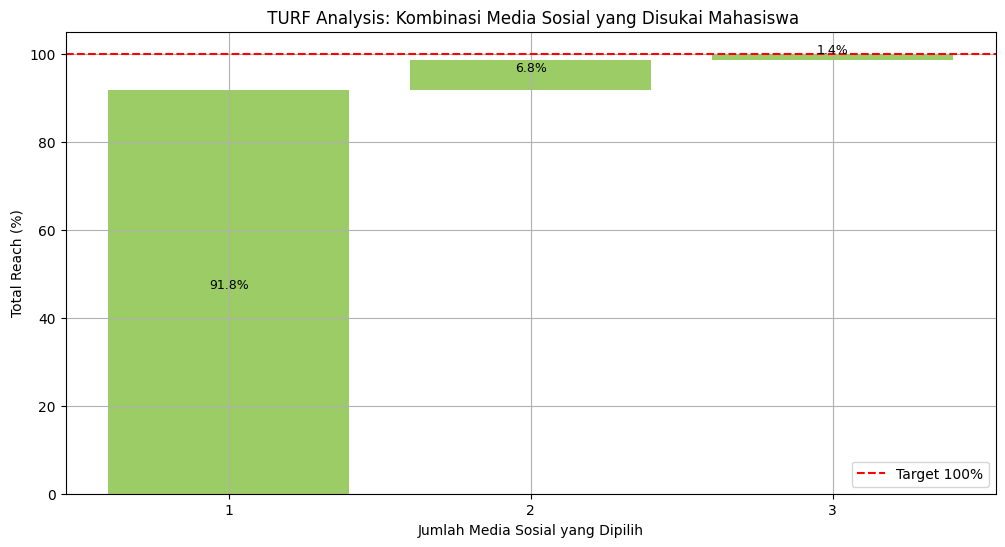

In [ ]:
#Visualisasi
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar(f"{i + 1}", inc * 100, bottom=bottoms, color="#9ccc65")
    plt.text(i, bottoms + inc * 50, f"{inc * 100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100

plt.axhline(y=100, color='r', linestyle='--', label='Target 100%')
plt.xlabel("Jumlah Media Sosial yang Dipilih")
plt.ylabel("Total Reach (%)")
plt.title(" TURF Analysis: Kombinasi Media Sosial yang Disukai Mahasiswa")
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan hasil analisis TURF terhadap preferensi media sosial mahasiswa, dapat disimpulkan bahwa hanya dengan memilih tiga media sosial saja, seluruh mahasiswa (100%) telah berhasil dijangkau. Media sosial pertama yang dipilih sudah mampu menjangkau sekitar 91,8% dari responden secara langsung, menunjukkan bahwa platform tersebut sangat dominan dan menjadi yang paling populer di kalangan mahasiswa. Penambahan media sosial kedua meningkatkan jangkauan sebesar 6,8%, dan media sosial ketiga menambah jangkauan sebesar 1,4% sehingga totalnya mencapai 100%. Hal ini menunjukkan bahwa sebagian besar mahasiswa terkonsentrasi pada satu atau dua platform utama, sementara platform lainnya memberikan kontribusi yang sangat kecil. Oleh karena itu, dalam menyusun strategi komunikasi, promosi, atau penyebaran informasi kepada mahasiswa, cukup dengan memfokuskan pada dua hingga tiga media sosial utama yang paling sering digunakan agar strategi tersebut efisien namun tetap efektif.

In [ ]:
#  Hasil Akhir & Insight
print(f"\n Target 100% tercapai dengan {len(selected_media)} media sosial.\n")
print(" Media Sosial terbaik untuk menjangkau seluruh mahasiswa:")
for i, m in enumerate(selected_media):
    print(f"{i+1}. {m}")

print("\n Insight:")
print(f"1. Kombinasi {len(selected_media)} media sosial sudah mencakup semua preferensi mahasiswa.")
print(f"2. Media sosial paling dominan adalah '{selected_media[0]}', menjangkau sekitar {df_media[selected_media[0]].sum() / n_responden:.1%} mahasiswa.")
print(f"3. Setelah {len(selected_media)} media sosial, penambahan lainnya tidak lagi meningkatkan jangkauan.")


 Target 100% tercapai dengan 3 media sosial.

 Media Sosial terbaik untuk menjangkau seluruh mahasiswa:
1. WhatsApp
2. TikTok
3. Instagram

 Insight:
1. Kombinasi 3 media sosial sudah mencakup semua preferensi mahasiswa.
2. Media sosial paling dominan adalah 'WhatsApp', menjangkau sekitar 91.8% mahasiswa.
3. Setelah 3 media sosial, penambahan lainnya tidak lagi meningkatkan jangkauan.


# Insight
1. Efisiensi Jangkauan Maksimal dengan Kombinasi Minimal
Hasil analisis menunjukkan bahwa untuk menjangkau 100% mahasiswa, hanya diperlukan tiga platform media sosial. Ini menunjukkan efisiensi yang tinggi: dengan sedikit media sosial, institusi atau brand dapat menjangkau seluruh target audiens secara efektif.

2. Dominasi Media Sosial Tertentu
Platform media sosial pertama yang dipilih berhasil menjangkau sekitar 91,8% dari seluruh responden. Hal ini menegaskan bahwa platform tersebut sangat dominan dan menjadi yang paling disukai mahasiswa. Ini adalah platform yang paling strategis untuk dijadikan fokus utama dalam penyebaran informasi atau kampanye digital.

3. Kontribusi Marginal Media Sosial Tambahan
Media sosial kedua dan ketiga hanya menambahkan 6,8% dan 1,4% reach secara berturut-turut. Setelah platform ketiga, penambahan media sosial lainnya tidak memberikan kontribusi tambahan terhadap jangkauan total. Artinya, ada titik jenuh di mana menambahkan lebih banyak platform tidak lagi efektif.

3. Strategi Komunikasi Lebih Tepat Sasaran
Dengan memahami kombinasi media sosial yang paling disukai, lembaga pendidikan, pemasar, atau pembuat konten dapat menyesuaikan strategi mereka, baik dalam hal anggaran, fokus platform, maupun jenis konten yang disebarkan, sehingga tidak menyebarkan sumber daya secara merata ke platform yang sebenarnya kurang efektif.

4. Pentingnya Pemahaman Preferensi Audiens
Analisis TURF memberikan gambaran yang tajam tentang apa yang benar-benar digunakan dan disukai oleh mahasiswa, bukan sekadar asumsi. Ini mendukung pengambilan keputusan berbasis data (data-driven decision making) yang lebih akurat dan berdampak.